# Analyse plus détaillée

Dans ce notebook, on effectue juste une analyse plus détaillée , pour regarder les liens entre les variables et tester les hypothèses que nous avons émises dans le notebook précédent.

Relation Variables / Variables:

   - blood_data / blood_data : certaines variables sont tres corrélées : +0.9 (à suveiller plus tard)
   - blood_data / age : tres faible corrélation entre age et taux sanguins
   - viral / viral : influenza rapid test donne de mauvais résultats, il fauda peut-etre la laisser tomber
   - relation maladie / blood data : Les taux sanguins entre malades et covid-19 sont différents
   - relation hospitalisation / blood : intéressant dans le cas ou on voudrait prédire dans quel service un patient devrait aller
   
NaN analyse : viral : 1350(92/8), blood : 600(87/13), both : 90


hypotheses nulle (H0):

Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents

H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs.
Les individus atteints d'une quelconque maladie ont des taux significativement différents

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_row', 111)

In [5]:
data = pd.read_excel("dataset.xlsx")
data.head(n=6)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
target = data["SARS-Cov-2 exam result"]
features = data.drop(["SARS-Cov-2 exam result", "Patient ID"], axis=1)
features.head(n=6)

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
features = features[features.columns[(features.isna().sum()/features.shape[0]) < 0.9]]

In [8]:
positive_data = data[data['SARS-Cov-2 exam result'] == "positive"]
negative_data = data[data['SARS-Cov-2 exam result'] == "negative"]

In [9]:
missing_rate = data.isna().sum()/data.shape[0]
blood_features = data.columns[(missing_rate < 0.9) & (missing_rate > 0.86)]
viral_features = data.columns[(missing_rate < 0.8) & (missing_rate > 0.7)]

## Relations variables/variables

### Relations taux sanguins

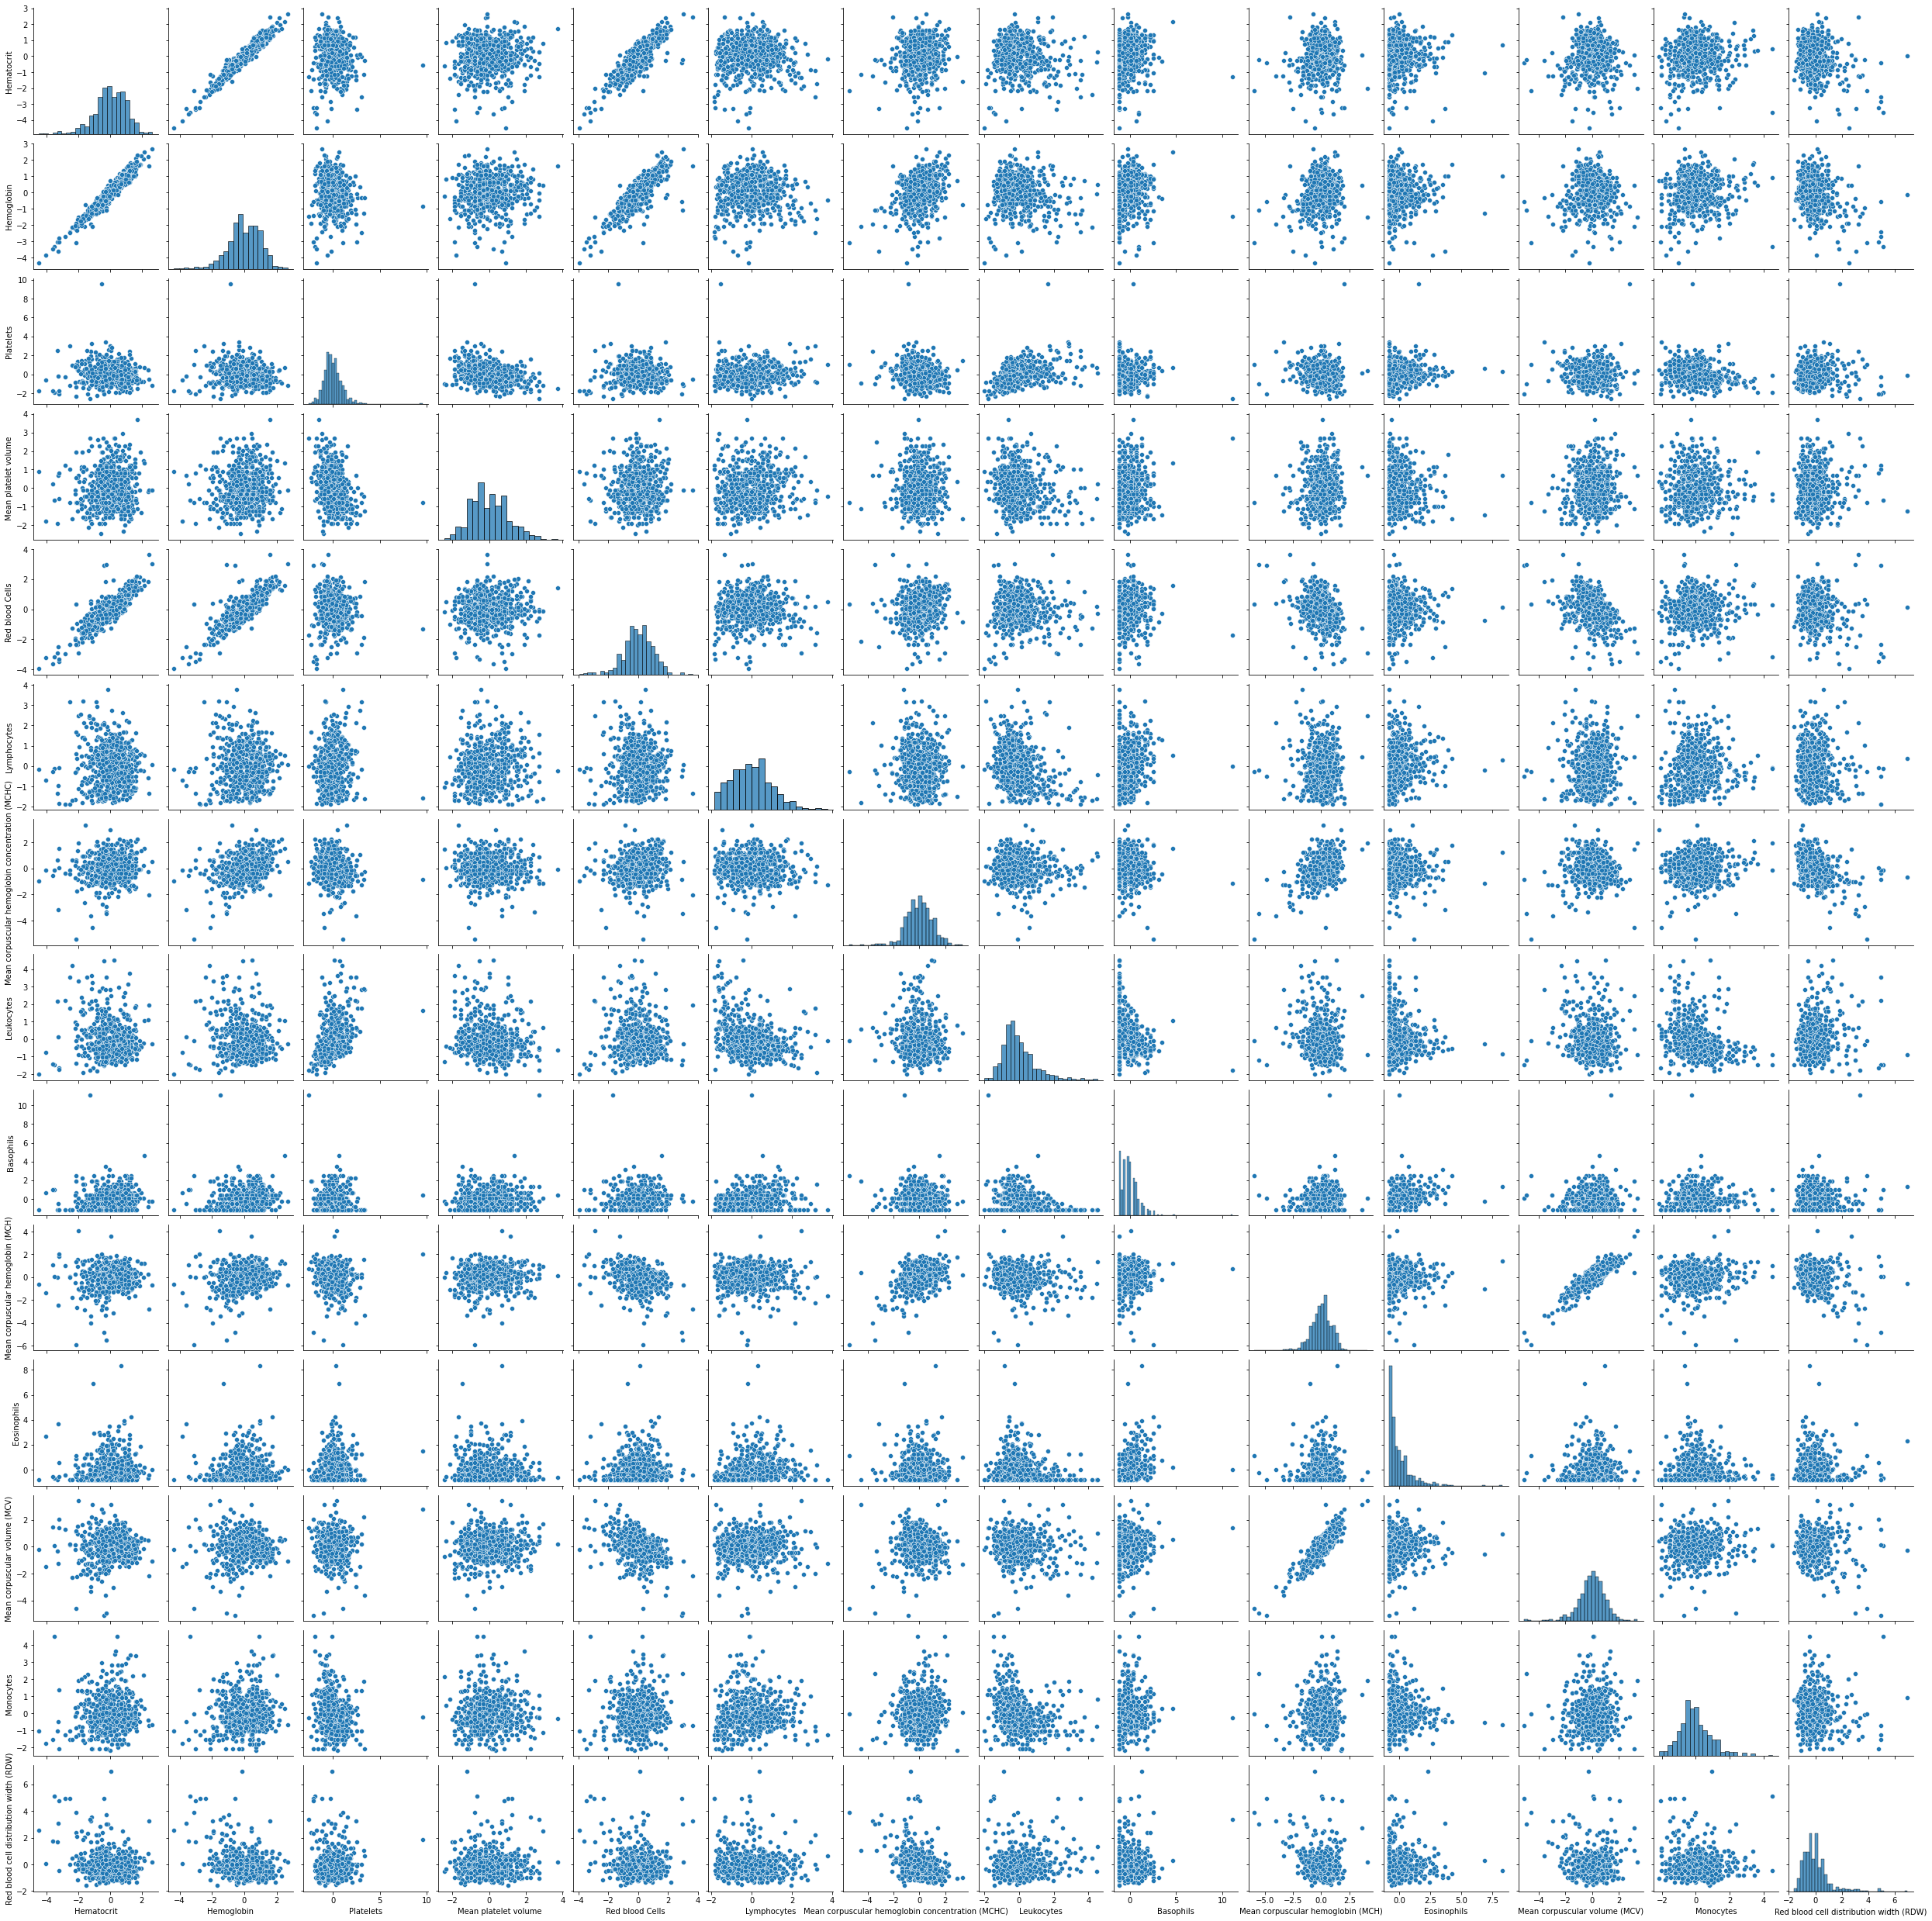

In [12]:
sns.pairplot(data[blood_features])

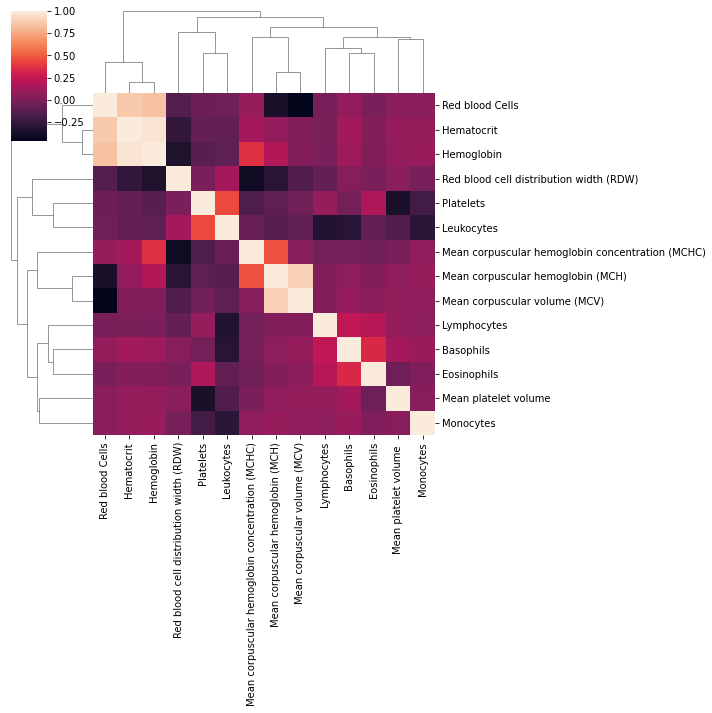

In [14]:
sns.clustermap(data[blood_features].corr())

### Relations Age/Sang

<Figure size 432x288 with 0 Axes>

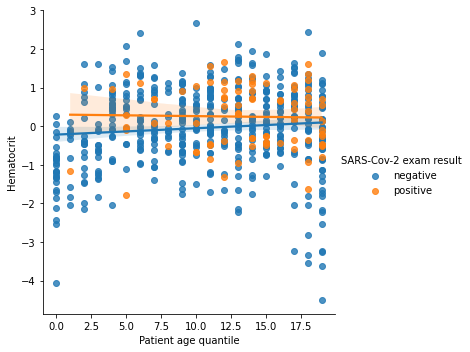

<Figure size 432x288 with 0 Axes>

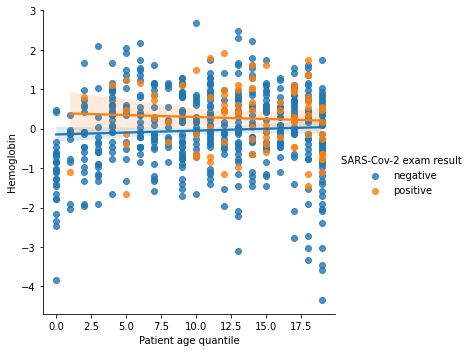

<Figure size 432x288 with 0 Axes>

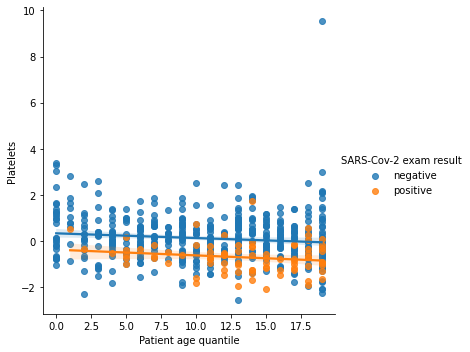

<Figure size 432x288 with 0 Axes>

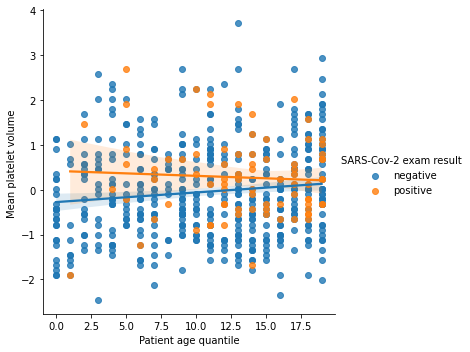

<Figure size 432x288 with 0 Axes>

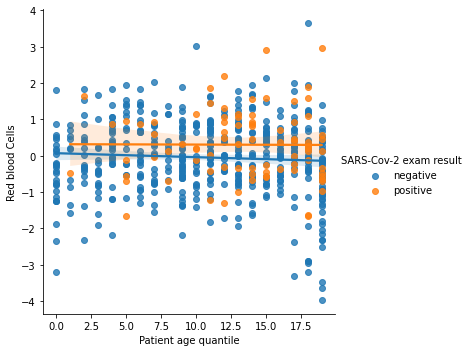

<Figure size 432x288 with 0 Axes>

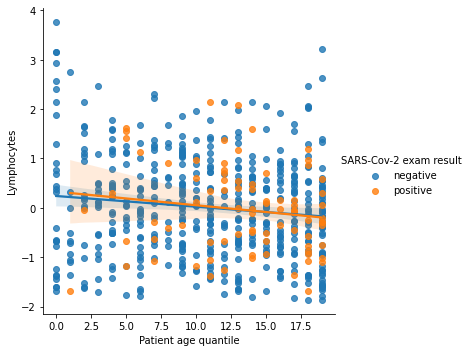

<Figure size 432x288 with 0 Axes>

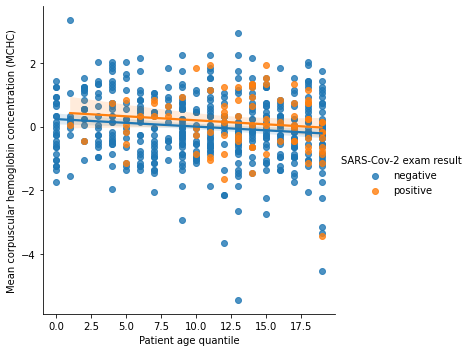

<Figure size 432x288 with 0 Axes>

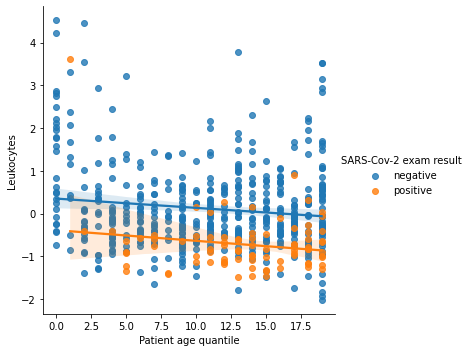

<Figure size 432x288 with 0 Axes>

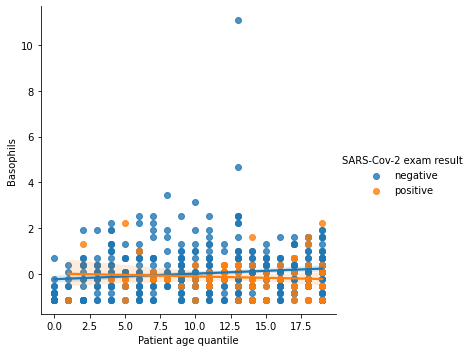

<Figure size 432x288 with 0 Axes>

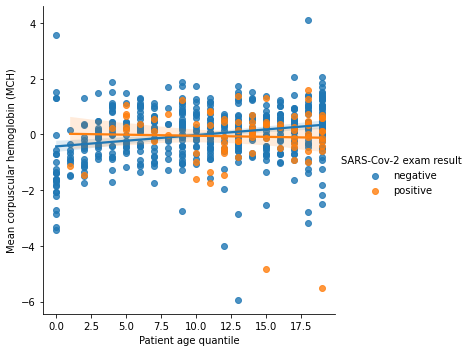

<Figure size 432x288 with 0 Axes>

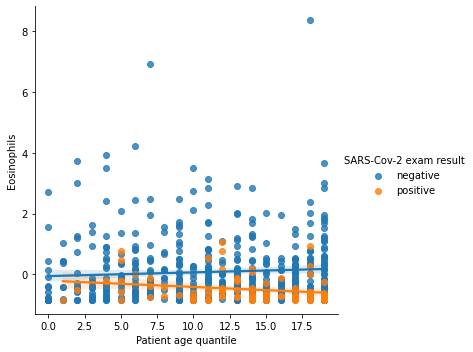

<Figure size 432x288 with 0 Axes>

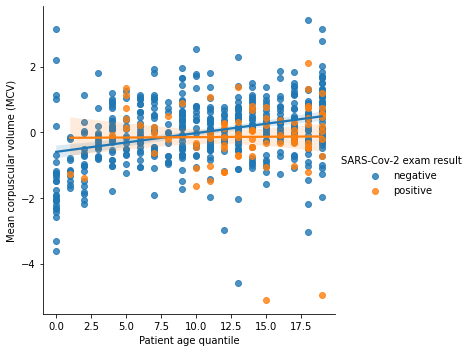

<Figure size 432x288 with 0 Axes>

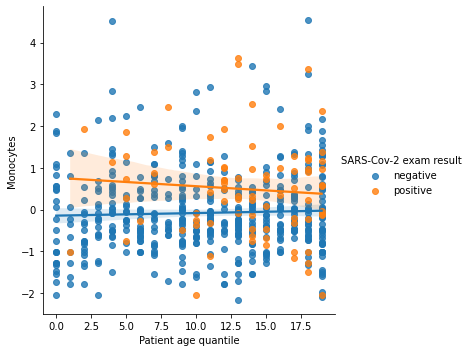

<Figure size 432x288 with 0 Axes>

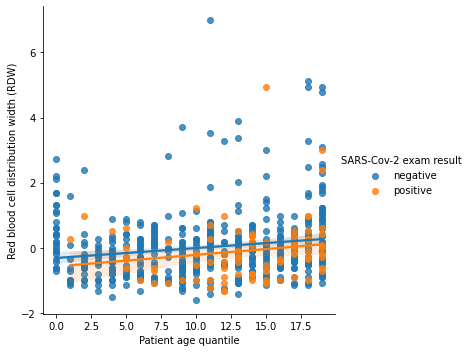

In [15]:
for col in blood_features:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=data)

In [18]:
data.corr()['Patient age quantile'].sort_values()

Phosphor                                                -0.511705
Alkaline phosphatase                                    -0.480906
pCO2 (arterial blood gas analysis)                      -0.469049
Lipase dosage                                           -0.357362
Arteiral Fio2                                           -0.334562
Ionized calcium                                         -0.309841
Hb saturation (arterial blood gases)                    -0.223949
Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lactic Dehydrogenase                                    -0.149753
Albumin                                                 -0.137290
Magnesium                                               -0.127646
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Relationship (Patient/Normal)                           -0.122878
Urine - De

### Relations Influenza/rapid test

In [20]:
pd.crosstab(data['Influenza A'], data['Influenza A, rapid test'])

"Influenza A, rapid test",negative,positive
Influenza A,,
detected,2,4
not_detected,245,15


In [21]:
pd.crosstab(data['Influenza B'], data['Influenza B, rapid test'])

"Influenza B, rapid test",negative,positive
Influenza B,,
detected,18,11
not_detected,233,4



## Relations viral/sanguin

Création d'une nouvelle variable pour savoir si l'individu est atteint d'un virus

In [24]:
data['est malade'] = np.sum(data[viral_features[:-2]] == 'detected', axis=1) >=1

In [25]:
malade_data = data[data['est malade'] == True]
non_malade_data = data[data['est malade'] == False]

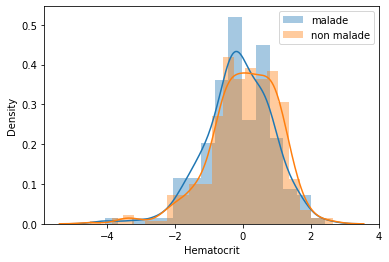

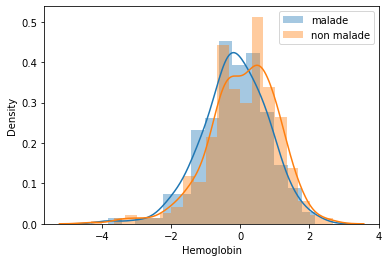

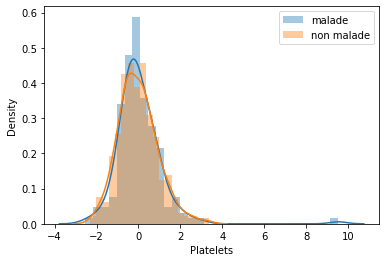

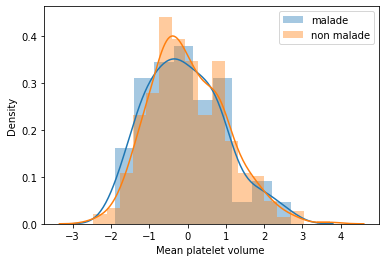

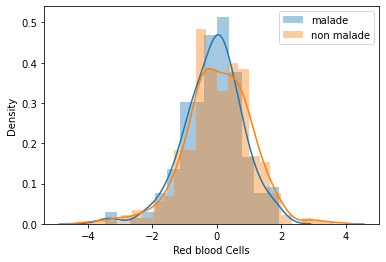

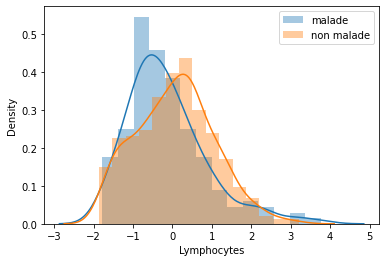

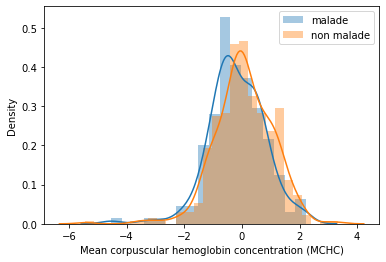

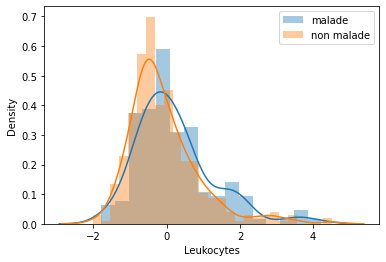

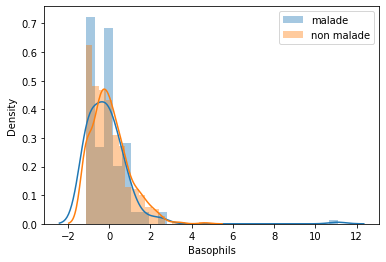

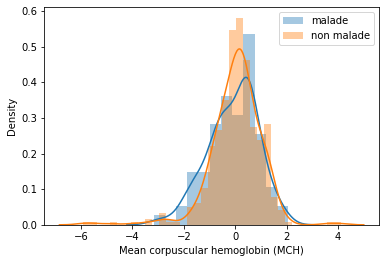

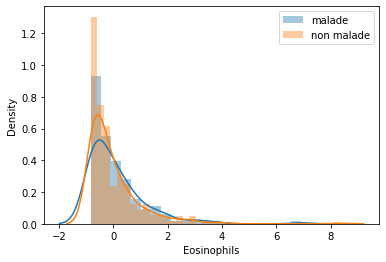

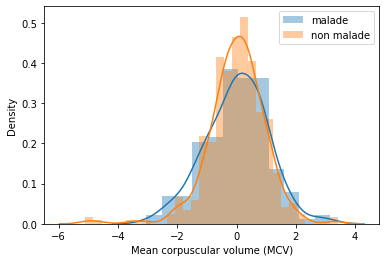

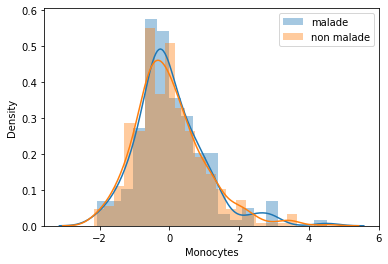

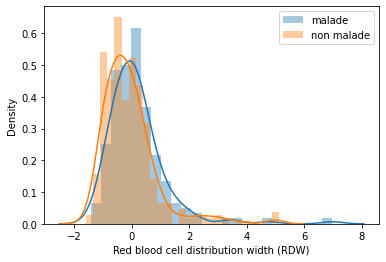

In [26]:
for col in blood_features:
    plt.figure()
    sns.distplot(malade_data[col], label='malade')
    sns.distplot(non_malade_data[col], label='non malade')
    plt.legend()

In [27]:
def hospitalisation(data):
    if data['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif data['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif data['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [29]:
data['statut'] = data.apply(hospitalisation, axis=1)

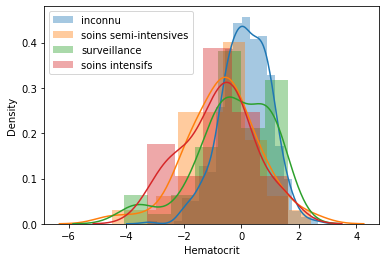

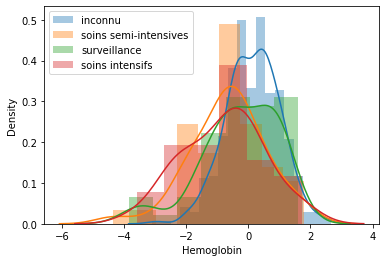

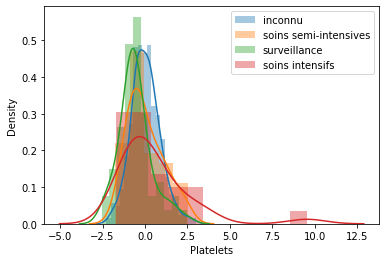

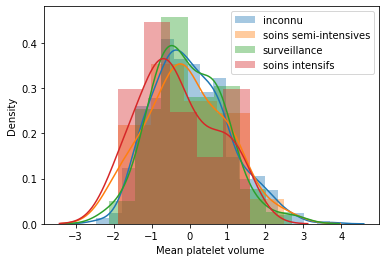

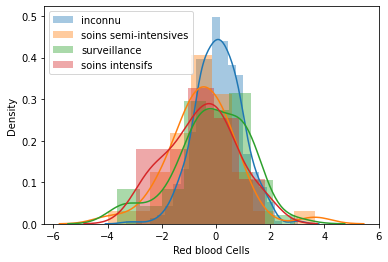

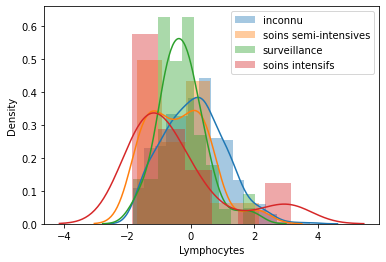

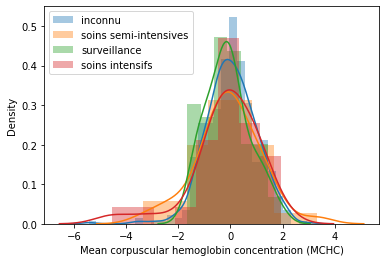

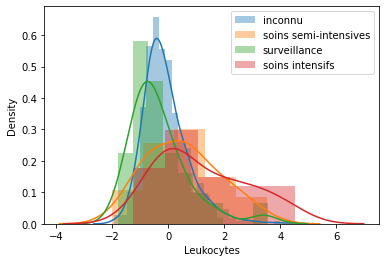

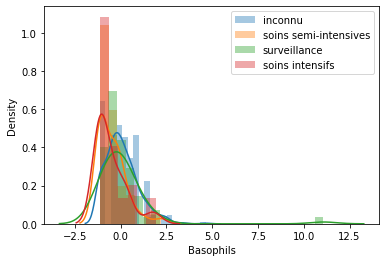

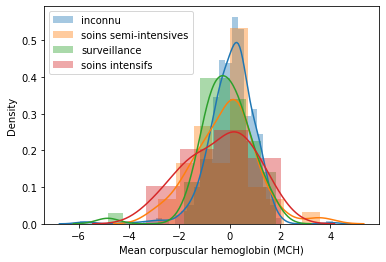

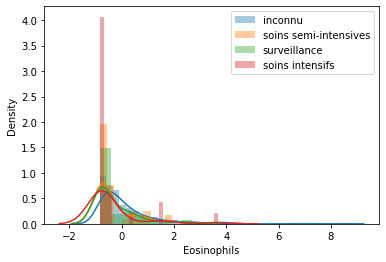

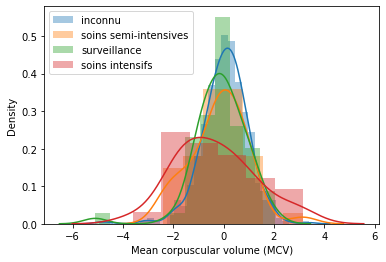

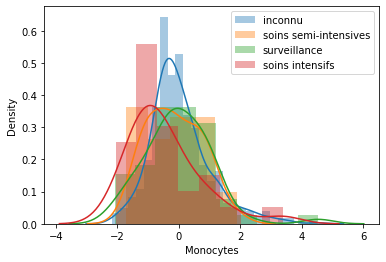

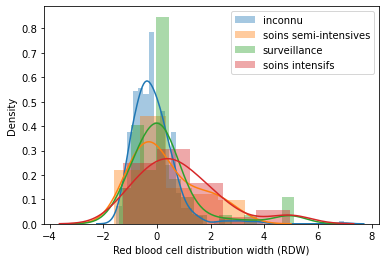

In [30]:
for col in blood_features:
    plt.figure()
    for cat in data['statut'].unique():
        sns.distplot(data[data['statut']==cat][col], label=cat)
    plt.legend()

In [33]:
data[blood_features].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [36]:
data[viral_features].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
dtype: int64

In [37]:
data1 = data[viral_features[:-2]]
data1['covid'] = data['SARS-Cov-2 exam result']
data1.dropna()['covid'].value_counts(normalize=True)

negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [38]:
data2 = data[blood_features]
data2['covid'] = data['SARS-Cov-2 exam result']
data2.dropna()['covid'].value_counts(normalize=True)

negative    0.864548
positive    0.135452
Name: covid, dtype: float64

## Tests d'hypothèses

In [39]:
from scipy.stats import ttest_ind

In [41]:
balanced_neg = negative_data.sample(positive_data.shape[0])

In [42]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_data[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [43]:
for col in blood_features:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- H0 Rejetée
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)----------- 0
